In [25]:
import numpy as np
from numpy import pi as π
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

import dgutils
from dgutils import colors as colortools
from numpy import pi as π
from wetting_utils import *
from collections import defaultdict
import matplotlib.transforms as mtransforms
from heprops import helium,potential
from pimcscripts import pimchelp


%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
T = [0.5, 1.0, 1.5]  # K

In [26]:
f2 = open('../data/pimc/temp-decrease/radial-N-reduce-7ca726e1-0504-4b37-a342-77c44d0978b6.dat','r')
lines = f2.readlines()
x1h = np.array([])
y1h = np.array([])
z1h = np.array([])
for line in lines[3:]:
    p = line.split()
    x1h = np.append(x1h,float(p[0]))
    y1h = np.append(y1h,float(p[1]))
    z1h = np.append(z1h,float(p[2]))
f2.close()
normalize_psi_PIMC(y1h,x1h)

np.float64(1.974616283525505)

In [27]:
f2 = open('../data/pimc/temp-decrease/radial-N-reduce-aae54738-4649-463a-88db-ac89832b906d.dat','r')
lines = f2.readlines()
x2 = np.array([])
y2 = np.array([])
z2 = np.array([])
for line in lines[3:]:
    p = line.split()
    x2 = np.append(x2,float(p[0]))
    y2 = np.append(y2,float(p[1]))
    z2 = np.append(z2,float(p[2]))
f2.close()
normalize_psi_PIMC(y2,x2)

np.float64(1.9759075939366437)

In [28]:
f2 = open('../data/pimc/temp-decrease/radial-N-reduce-4cb02885-e62e-43a2-91a3-857124b3016c.dat','r')
lines = f2.readlines()
x1 = np.array([])
y1 = np.array([])
z1 = np.array([])
for line in lines[3:]:
    p = line.split()
    x1 = np.append(x1,float(p[0]))
    y1 = np.append(y1,float(p[1]))
    z1 = np.append(z1,float(p[2]))
f2.close()
normalize_psi_PIMC(y1,x1)

np.float64(1.9771521900689228)

In [29]:
fname = "../data/Relaxation/Radial-wavefunction-CsR8.npz"
with np.load(fname) as f:
   rval = f['arr_0']
   radial = f['arr_1']
norm = normalize_psi_PIMC(radial,rval)

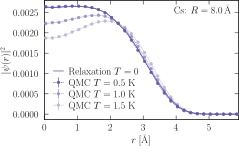

In [60]:
el = 'Cs'
cR = 8.0
col = element_colors[el]

with plt.style.context('aps'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
    ax.plot(rval,radial,label='Relaxation $T=0$',color='#5E4FA2',linestyle='solid',alpha=1.0,zorder=10)
    ax.errorbar(x1h[::5],y1h[::5],z1h[::5],label=r'QMC $T=0.5~{\rm K}$',color=colortools.get_alpha_hex(col,0.9),linestyle=':',ms=2.5, marker='o',zorder=9)
    ax.errorbar(x2[::5],y2[::5],z2[::5],label=r'QMC $T=1.0~{\rm K}$',color=colortools.get_alpha_hex(col,0.6),linestyle=':',ms=2.5, marker='o',zorder=8)
    ax.errorbar(x1[::5],y1[::5],z1[::5],label=r'QMC $T=1.5~{\rm K}$',color=colortools.get_alpha_hex(col,0.4),linestyle=':', ms=2.5, marker='o',zorder=7)
    ax.set_xlabel(r'$r\;[{\rm \AA}] $')

    ax.set_ylabel(r'$|\psi(r)|^2$')

    ax.text(0.98, 0.95, f'{el}: ' + f'$R = {cR:.1f}\,$'+r'${\rm \AA}$', transform=ax.transAxes, va='top', ha='right')

    ax.set_xlim(0,5.9)
    ax.legend(loc='lower left', handlelength = 1)
    plt.savefig('../figures/pimc_comparison.pdf')

In [10]:
rval

radial

array([2.61817704e-03, 2.62265417e-03, 2.63905056e-03, 2.64907190e-03,
       2.63829952e-03, 2.58865190e-03, 2.48994101e-03, 2.25605638e-03,
       1.99624350e-03, 1.61273615e-03, 1.17820920e-03, 7.71365284e-04,
       4.09901924e-04, 1.67131522e-04, 4.51164842e-05, 8.02085833e-06,
       3.25120047e-07, 8.62649445e-09, 6.98288817e-11, 1.22039691e-12,
       9.95357987e-15, 1.66778683e-16, 6.23686753e-17, 3.70103149e-17,
       2.54035513e-17, 2.24257317e-17])

In [22]:
np.savetxt('./rho_vs_r_qmc.dat',np.stack([x1h,y1h,z1h],axis=1))

In [18]:
g = np.stack([rval,radial],axis=1)

In [19]:
g.shape

(26, 2)